In [7]:
# for use in jupyter notebook. use
# pip install tensorflow   ~ 500 MBS

### Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
# Import necessary libraries for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


# MLP Dependencies
from tensorflow.keras  import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as tf


### Load the dataset

In [ ]:
# Load the dataset as a pandas DataFrame
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
# retrieve numpy array
dataset = df.values
# df=df[0:]
# df.drop()

In [51]:
print(df.dtypes)


Age                          int64
Attrition                   object
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

### Data Preprocessing

In [27]:
# Select columns with data type 'object' from the DataFrame and create a new DataFrame 'obj_df'
obj_df = df.select_dtypes(include=['object']).copy()

# Display the first few rows of the 'obj_df' DataFrame for inspection
obj_df.head()

# Drop specified columns from the original DataFrame ('df') as they are not required for the prediction
df.drop(["Department", "BusinessTravel", "EducationField", "JobRole", "Over18"], inplace=True, axis=1)

# Define a dictionary ('cleanup_nums') for mapping categorical values to numerical values
cleanup_nums = {
    "Gender": {"Male": 0, "Female": 1},                 # Map 'Male' to 0 and 'Female' to 1
    "MaritalStatus": {"Single": 0, "Married": 1, "Divorced": 2},  # Map 'Single' to 0, 'Married' to 1, and 'Divorced' to 2
    "Attrition": {"Yes": 1, "No": 0},                   # Map 'Yes' to 1 and 'No' to 0
    "OverTime": {"Yes": 1, "No": 0}                      # Map 'Yes' to 1 and 'No' to 0
}


In [28]:
obj_df

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [29]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,1,1,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,279,8,1,1,2,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,1,5,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,591,2,1,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,1,2061,3,Male,41,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,613,6,1,1,2062,4,Male,42,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,155,4,3,1,2064,2,Male,87,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,1023,2,3,1,2065,4,Male,63,...,4,80,0,17,3,2,9,6,0,8


In [30]:
# Use the 'cleanup_nums' dictionary to replace categorical values with their corresponding numerical values
new_obj_df = df.replace(cleanup_nums)

# Display the first few rows of the new DataFrame ('new_obj_df') after replacing categorical values
new_obj_df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,1,94,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,0,61,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,0,92,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,1,56,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,0,40,...,4,80,1,6,3,3,2,2,2,2


In [31]:
# Assign the DataFrame 'new_obj_df' to the variable 'X'
X = new_obj_df

# Drop the 'PerformanceRating' column from the DataFrame 'X'
X = X.drop('PerformanceRating', axis=1)

# Display the shape of the DataFrame 'X'
print(X.shape)

(1470, 29)


In [32]:
# Assign the 'PerformanceRating' column to the variable 'Y'
Y = new_obj_df["PerformanceRating"]
print(Y)

0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64


In [33]:
new_obj_df.dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

In [34]:
# Use SelectKBest with chi-squared test to select the top 10 features
chi2_features = SelectKBest(chi2, k=10)
X_kbest_features = chi2_features.fit_transform(X, Y)

# Display the number of features before and after feature selection
print(X.shape[1])
print(X_kbest_features.shape[1])

29
10


In [35]:
# Display the reduced features
X_kbest_features

array([[   1,    1, 5993, ...,    4,    0,    5],
       [   8,    2, 5130, ...,    7,    1,    7],
       [   2,    4, 2090, ...,    0,    0,    0],
       ...,
       [   4, 2064, 6142, ...,    2,    0,    3],
       [   2, 2065, 5390, ...,    6,    0,    8],
       [   8, 2068, 4404, ...,    3,    1,    2]], dtype=int64)

In [36]:
# Access a specific element in the reduced features array
print(X_kbest_features[1][1])

2


In [37]:
# Convert the reduced features array to a DataFrame
X_kbest_features = pd.DataFrame(X_kbest_features)

In [38]:
X_kbest_features

,0,1,2,3,4,5,6,7,8,9
0,1,1,5993,19479,8,11,1,4,0,5
1,8,2,5130,24907,1,23,4,7,1,7
2,2,4,2090,2396,6,15,2,0,0,0
3,3,5,2909,23159,1,11,3,7,3,0
4,2,7,3468,16632,9,12,4,2,2,2
...,...,...,...,...,...,...,...,...,...,...
1465,23,2061,2571,12290,4,17,3,2,0,3
1466,6,2062,9991,21457,4,15,1,7,1,7
1467,4,2064,6142,5174,1,20,2,2,0,3
1468,2,2065,5390,13243,2,14,4,6,0,8


### Gaussian Naive Bayes Implementation

In [39]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_kbest_features, Y, test_size=0.25, random_state=0)


In [40]:
# Standardize the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [41]:
# Use Gaussian Naive Bayes classifier for training
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [42]:
# Make predictions on the test set
Y_pred = classifier.predict(X_test)

# Evaluate the model using confusion matrix and accuracy score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[306   1]
 [  0  61]]


0.9972826086956522

### Multi-Layered Perceptron Implementation

In [43]:
# Convert the feature matrix to float32 data type
X_kbest_features = X_kbest_features.astype('float32')

# Encode the target variable 'Y' to integers using LabelEncoder
Y = LabelEncoder().fit_transform(Y)

In [44]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_kbest_features, Y, test_size=0.25, random_state=0)


In [45]:
# Standardize the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
# Display the shape of the target variable 'Y_train'
Y_train.shape

(1102,)

In [47]:
# Convert the training feature matrix to a DataFrame and display the first few rows
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.003241,0.485496,0.041081,0.303802,-1.077010,-1.141940,-1.567659,1.055581,1.511937,0.264861
1,-0.879534,1.587919,-1.133597,0.465128,-0.683878,-1.141940,0.278025,-1.154871,-0.677491,-1.152015
2,-0.260998,0.768212,0.844396,0.946286,0.102386,-0.319982,-0.644817,0.779274,-0.677491,0.831611
3,-0.384705,0.952228,-0.194490,0.771845,0.102386,-0.593968,1.200867,-0.602258,-0.677491,-0.585265
4,-1.003241,1.393866,-0.799518,-0.527930,-0.683878,-0.045996,-0.644817,-0.602258,-0.051940,-0.585265


In [48]:
# Convert the training target variable to a DataFrame and display the first 20 rows
Y_train = pd.DataFrame(Y_train)
Y_train.head(20)


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [49]:
# Get the number of features in the training set
n_features = X_train.shape[1]
print(n_features)

10


In [177]:
# Build a sequential neural network model using Keras
model = Sequential()
model.add(Dense(20, input_dim=10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [178]:
# Choose the optimizer (Stochastic Gradient Descent - SGD with momentum) and compile the model
sgd = tf.optimizers.SGD(learning_rate=0.009, momentum=0.9)
model.compile(loss="binary_crossentropy", 
              optimizer=sgd, 
              metrics=['accuracy']
              )


In [179]:
'''If the accuracy is not changing, it means the optimizer has found a local minimum for the loss. This may be an undesirable minimum. One common local minimum is to always predict the class with the most number of data points. You should use weighting on the classes to avoid this minimum.

from sklearn.utils import compute_class_weight
classWeight = compute_class_weight('balanced', outputLabels, outputs) 
classWeight = dict(enumerate(classWeight))
model.fit(X_train, y_train, batch_size = batch_size, nb_epoch = nb_epochs, show_accuracy = True, verbose = 2, validation_data = (X_test, y_test), class_weight=classWeight)

'''


"If the accuracy is not changing, it means the optimizer has found a local minimum for the loss. This may be an undesirable minimum. One common local minimum is to always predict the class with the most number of data points. You should use weighting on the classes to avoid this minimum.\n\nfrom sklearn.utils import compute_class_weight\nclassWeight = compute_class_weight('balanced', outputLabels, outputs) \nclassWeight = dict(enumerate(classWeight))\nmodel.fit(X_train, y_train, batch_size = batch_size, nb_epoch = nb_epochs, show_accuracy = True, verbose = 2, validation_data = (X_test, y_test), class_weight=classWeight)\n\n"

In [180]:
# Set up early stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', patience=5)

In [181]:
# Fit the model to the training data
history = model.fit(X_train, Y_train, epochs=250, batch_size=32, verbose=1, validation_split=0.2, callbacks=[es])


Epoch 1/250
28/28 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 0.8082 - val_loss: 0.3817 - val_accuracy: 0.8552
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8490 - val_loss: 0.2950 - val_accuracy: 0.8552
Epoch 3/250
28/28 [==============================] - 0s 2ms/step - loss: 0.2659 - accuracy: 0.8717 - val_loss: 0.2198 - val_accuracy: 0.9095
Epoch 4/250
28/28 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9217 - val_loss: 0.1515 - val_accuracy: 0.9457
Epoch 5/250
28/28 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9444 - val_loss: 0.1102 - val_accuracy: 0.9593
Epoch 6/250
28/28 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.9546 - val_loss: 0.0816 - val_accuracy: 0.9774
Epoch 7/250
28/28 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9694 - val_loss: 0.0627 - val_accuracy: 0.9819
Epoch 8/250
2

In [182]:
# Evaluate the model on the training set
loss, acv = model.evaluate(X_train, Y_train, verbose=0)
print("Train accuracy ", acv)

Train accuracy  0.9990925788879395


In [183]:
# Evaluate the model on the test set
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
print(acc)


Test Accuracy: 0.984
0.984375


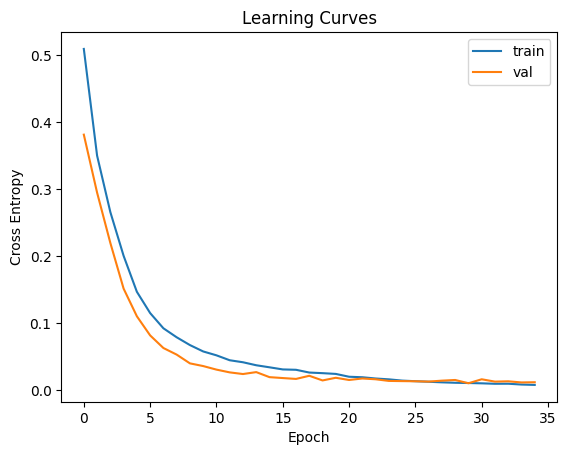

In [184]:
# Plot learning curves (training loss vs. validation loss over epochs)
from matplotlib import pyplot
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
#history.history["loss"]